In [1]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import tools
import pandas as pd
import sys


from ipywidgets import interact, fixed

def normalize_image(img):
    img = img.astype(float)
    return ( img - np.min(img)) / ( np.max(img) - np.min(img))

def normL1(imgX, imgY):
    return np.abs(imgX) + np.abs(imgY)

def normL2(imgX, imgY):
    return np.sqrt( imgX * imgX + imgY * imgY)

In [12]:
##Path of image:
image_path = '../train/images/input/elps_eye_80.png'

##Import image and characteristics:
original_img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
height, width = img.shape[0:2]

# Uniformization

In [13]:
def local_normalize_image(img, ksize=30):
    # Compute the local background and foreground for the image
    kernel = np.ones( ( ksize, ksize), np.uint8)
    
    if ksize % 2 == 0:
        ksize -= 1

    img_erd = cv2.GaussianBlur( cv2.erode( img, kernel, iterations = 1).astype( float), (ksize, ksize), 0)
    img_dlt = cv2.GaussianBlur( cv2.dilate( img, kernel, iterations = 1).astype( float), (ksize, ksize), 0)
    
    return tools.saturate_cast_uint8( ( img - img_erd) * 255.0 / ( img_dlt - img_erd + 1))

# Lightning uniformization - Offset and gain correction
img_norm = local_normalize_image(img, ksize=30)


# plot all the images and their histograms
"""
tools.multiPlot( 1, 2, ( img, img_norm),
                      ( 'Original image', 'Uniformized Image'),
                       cmap_tuple=( cm.gray, cm.gray))
"""




def update(ksize=100):
    img_norm = local_normalize_image(img_eroded, ksize)

    tools.multiPlot( 1, 2, ( img, img_norm),
                      ( 'Original image', 'Uniformized Image'),
                       cmap_tuple=( cm.gray, cm.gray))

interact(update, ksize=(5,150,5))




interactive(children=(IntSlider(value=100, description='ksize', max=150, min=5, step=5), Output()), _dom_class…

<function __main__.update(ksize=100)>

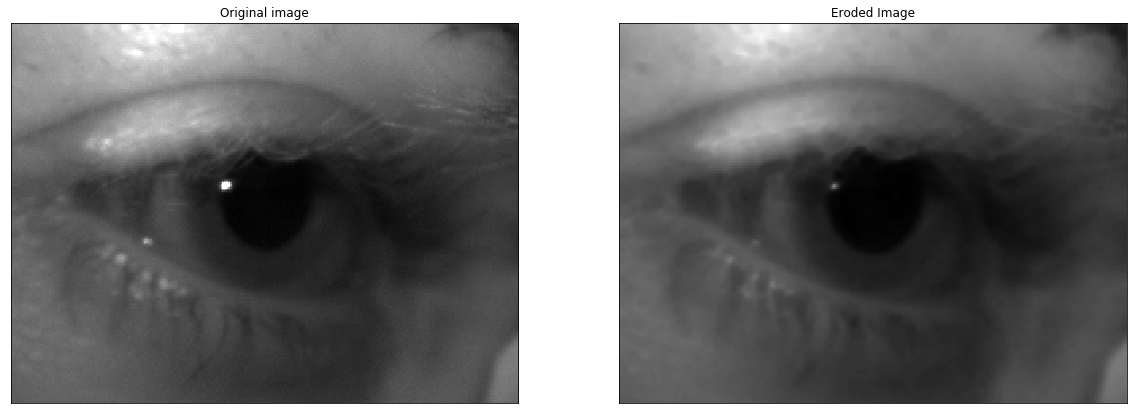

In [4]:
ksize = 4
kernel = np.ones( ( ksize, ksize), np.uint8)   
if ksize % 2 == 0:
    ksize -= 1


img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img_eroded = cv2.GaussianBlur( cv2.erode( img, kernel, iterations = 1).astype( float), (ksize, ksize), 0)




tools.multiPlot( 1, 2, ( img, img_eroded),
                      ( 'Original image', 'Eroded Image'),
                       cmap_tuple=( cm.gray, cm.gray))

# Erosion

In [14]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Compute the local background and foreground for the image
ksize = 20
kernel = np.ones( ( ksize, ksize), np.uint8)




def update(ksize=20):
    img_erd = cv2.GaussianBlur( cv2.erode(img, kernel, iterations = 1).astype( float), (ksize-1, ksize-1), 0)

    tools.multiPlot( 1, 2, ( img, img_erd),
                      ( 'Original image', 'Eroded Image'),
                       cmap_tuple=( cm.gray, cm.gray))

interact(update, ksize=(0,100,2))



interactive(children=(IntSlider(value=20, description='ksize', step=2), Output()), _dom_classes=('widget-inter…

<function __main__.update(ksize=20)>

# Median blur

In [6]:
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

def update(median_kernel=5):
    im_med_blur = cv2.medianBlur(img, median_kernel)

    tools.multiPlot( 1, 2, ( img, im_med_blur),
                     ( 'Original image', 'Median blur'),
                     cmap_tuple=( cm.gray, cm.gray))

interact(update, median_kernel = (3, 25, 2))

interactive(children=(IntSlider(value=5, description='median_kernel', max=25, min=3, step=2), Output()), _dom_…

<function __main__.update(median_kernel=5)>

# Bilateral filtering

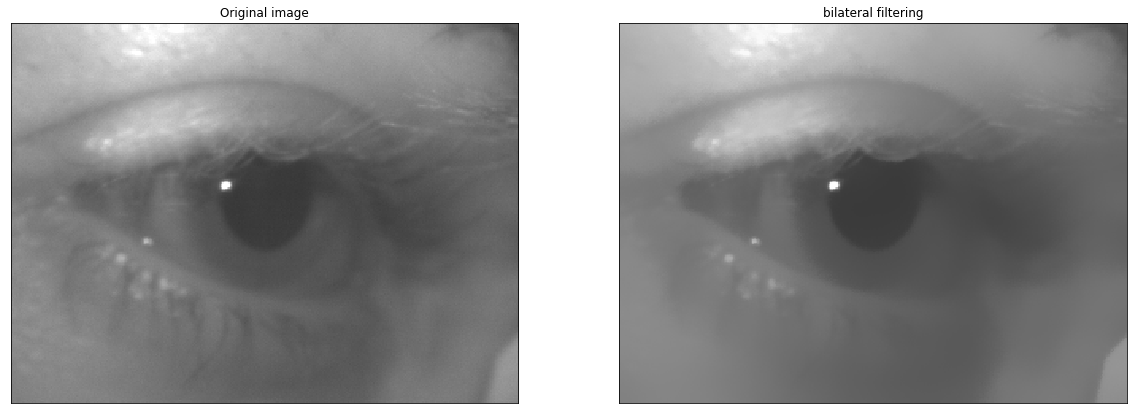

In [7]:
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img_bilat = cv2.bilateralFilter(img, -1, 25, 11)

tools.multiPlot( 1, 2, ( img, img_bilat),
                     ( 'Original image', 'bilateral filtering'),
                     cmap_tuple=( cm.gray, cm.gray))


# Gaussian Blur

In [8]:
img = cv2.imread(image_path, cv2.IMREAD_COLOR)
img_gauss_blur = cv2.GaussianBlur( pat_noisy, ( 1, 1), 0)

tools.multiPlot( 1, 2, ( img, img_gauss_blur),
                     ( 'Original image', 'gaussian blur'),
                     cmap_tuple=( cm.gray, cm.gray))

NameError: name 'pat_noisy' is not defined

# Median blur or kernel = 9 + uniformization

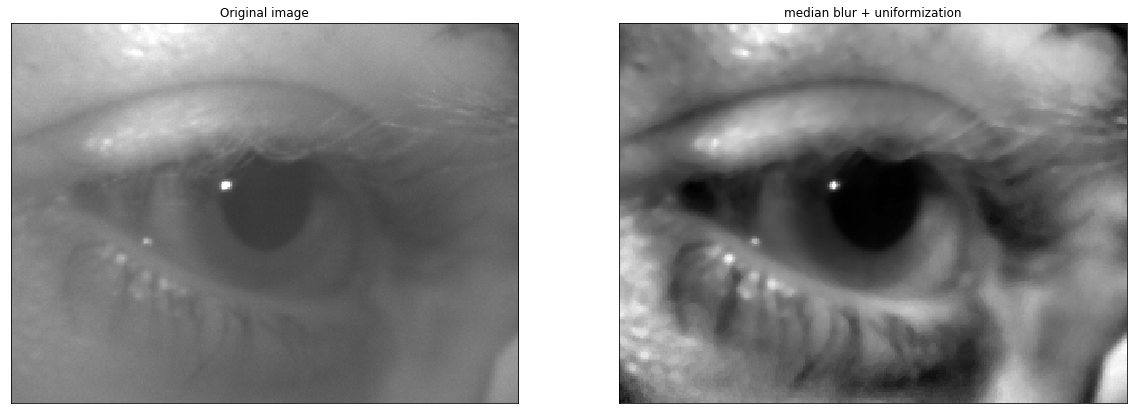

In [15]:
def local_normalize_image(img, ksize=30):
    # Compute the local background and foreground for the image
    kernel = np.ones( ( ksize, ksize), np.uint8)
    
    if ksize % 2 == 0:
        ksize -= 1

    img_erd = cv2.GaussianBlur( cv2.erode( img, kernel, iterations = 1).astype( float), (ksize, ksize), 0)
    img_dlt = cv2.GaussianBlur( cv2.dilate( img, kernel, iterations = 1).astype( float), (ksize, ksize), 0)
    
    return tools.saturate_cast_uint8( ( img - img_erd) * 255.0 / ( img_dlt - img_erd + 1))



median_kernel = 5

img = cv2.imread(image_path, cv2.IMREAD_COLOR)
med_blur = cv2.medianBlur(img, median_kernel)
unif_med = local_normalize_image(med_blur, ksize=80)













tools.multiPlot( 1, 2, ( img, unif_med),
                     ( 'Original image', 'median blur + uniformization'),
                     cmap_tuple=( cm.gray, cm.gray))

# Contrast augmentation

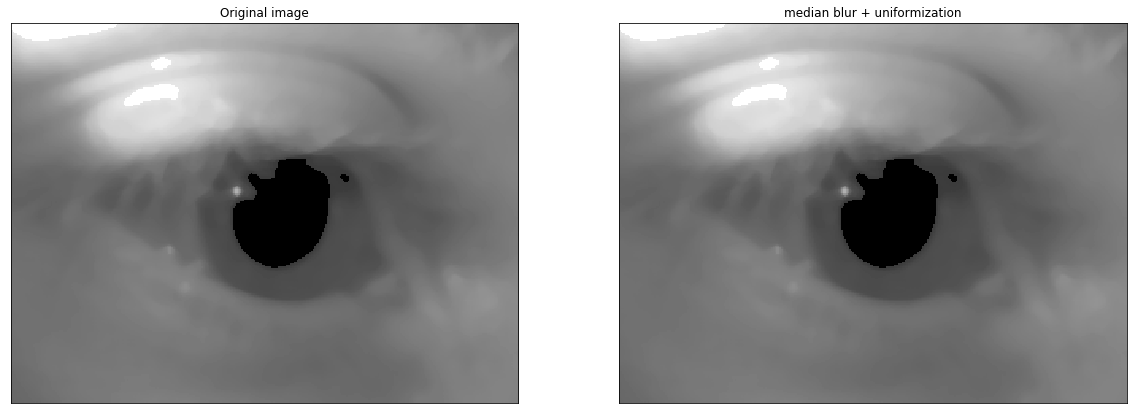

In [41]:
image_path = '../train/images/input/elps_eye_467.png'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

img = cv2.medianBlur(img, 9)

img[img>230] =255
img[img<=58] =0


tools.multiPlot( 1, 2, ( img, img),
                     ( 'Original image', 'median blur + uniformization'),
                     cmap_tuple=( cm.gray, cm.gray))

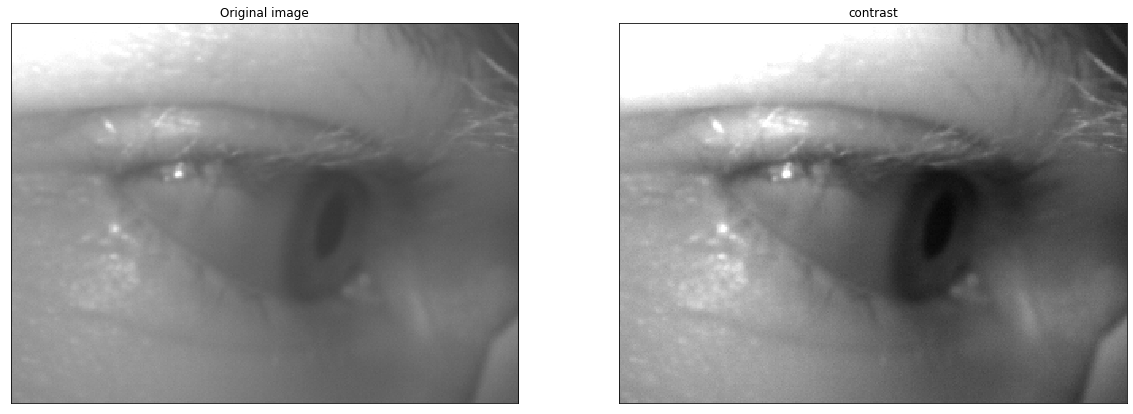

In [84]:
image_path = '../train/images/input/elps_eye_11.png'
img = cv2.imread(image_path)

c = 30

def apply_contrast(input_img, contrast = 0):
#source : https://stackoverflow.com/questions/39308030/how-do-i-increase-the-contrast-of-an-image-in-python-opencv
    buf = input_img.copy()
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

n_img = apply_contrast(img, c)


tools.multiPlot( 1, 2, ( img, n_img),
                     ( 'Original image', 'contrast'),
                     cmap_tuple=( cm.gray, cm.gray))
